In [19]:
pip install gensim

     |████████████████████████████████| 24.2 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 25.0 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.7 MB 17.3 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.2.1-py3-none-any.whl size=114113 sha256=352d59d2937b99e5a0e283b9d11c290a77d055d0c60cc88817c3e5506bd74731
  Stored in directory: /Users/bettyho/Library/Caches/pip/wheels/27/29/59/1e092b4bf54a2a70eb600ec0b5b82a5dee3149019148b15fb0
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install word2vec

     |████████████████████████████████| 42 kB 831 kB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=115533 sha256=a9f4b56093cce8158f1cf00e9b60326ced415e5189b19f4dd6d439bdf695ca29
  Stored in directory: /Users/bettyho/Library/Caches/pip/wheels/c9/c0/d4/29d797817e268124a32b6cf8beb8b8fe87b86f099d5a049e61
Successfully built word2vec
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec 
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv(r'Cargo Theft 2020.csv')
df

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-Q1,Wednesday,1/1/20,Garland,TX,"Garland, TX",USA,Motor oil,"$100,000",Cargo theft,Secure yard,No additional details,NaN,Overnight,Automobile & Parts
1,2020-Q1,Wednesday,1/1/20,Memphis,TN,"Memphis, TN",USA,Gas cylinders,"$10,000",Pilferage,Truck stop/Gas station,No additional details,NaN,Overnight,Construction & Industrial goods
2,2020-Q1,Wednesday,1/1/20,Ocala,FL,"Ocala, FL",USA,Televisions,"$137,000",Cargo theft,Secure yard,No additional details,NaN,Overnight,Consumer electronics
3,2020-Q1,Wednesday,1/1/20,South Holland,IL,"South Holland, IL",USA,Cell phones,"$100,000",Cargo theft,Truck stop/Gas station,East Tollway,NaN,NaN,Consumer electronics
4,2020-Q1,Friday,1/3/20,Zion,IL,"Zion, IL",USA,Mixed goods,$-,Seal break,Truck stop/Gas station,Russel Rd,No loss,Overnight,Mixed cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2020-Q3,Sunday,8/30/20,NaN,TN,", TN",USA,Soft drinks,NaN,Cargo theft,Unspecified,No additional details,NaN,NaN,Food & Drinks
479,2020-Q3,Sunday,8/30/20,NaN,TX,", TX",USA,Tires,NaN,Cargo theft,Unspecified,17 & 19 inch,NaN,NaN,Automobile & Parts
480,2020-Q3,Tuesday,9/1/20,NaN,TX,", TX",USA,Tools,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Construction & Industrial goods
481,2020-Q3,Tuesday,9/1/20,NaN,ON,", ON",CAN,Mixed cargo,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Mixed cargo


In [20]:
df = df.apply(lambda x: x.astype(str).str.lower())
df.head()

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-q1,wednesday,1/1/20,garland,tx,"garland, tx",usa,motor oil,"$100,000",cargo theft,secure yard,no additional details,nan,overnight,automobile & parts
1,2020-q1,wednesday,1/1/20,memphis,tn,"memphis, tn",usa,gas cylinders,"$10,000",pilferage,truck stop/gas station,no additional details,nan,overnight,construction & industrial goods
2,2020-q1,wednesday,1/1/20,ocala,fl,"ocala, fl",usa,televisions,"$137,000",cargo theft,secure yard,no additional details,nan,overnight,consumer electronics
3,2020-q1,wednesday,1/1/20,south holland,il,"south holland, il",usa,cell phones,"$100,000",cargo theft,truck stop/gas station,east tollway,nan,nan,consumer electronics
4,2020-q1,friday,1/3/20,zion,il,"zion, il",usa,mixed goods,$-,seal break,truck stop/gas station,russel rd,no loss,overnight,mixed cargo


In [49]:
day = {'monday': 1, 'tuesday': 2, 'wednesday': 3, 'thursday': 4, 'friday': 5, 'saturday': 6 , 'sunday': 7}
category = {'animal, farm, & equipment': 1, 'apparel': 2, 'automobile & parts': 3, 'beauty & personal care': 4, 
            'cleaning, plastic, & paper': 5, 'construction & industrial goods': 6, 'consumer electronics': 7, 
            'currency & firearms': 8, 'food & drinks': 9, 'household & appliances': 10, 'merchandise': 11,
            'metals': 12, 'mixed cargo': 13, 'pharma & medical supplies': 14, 'tobacco & alcohol': 15}
location = {'airline cargo terminal': 1, 'carrier yard/parking': 2, 'drop lot': 3, 'marine terminal': 4, 
            'origin/dc': 5, 'parking lot': 6, 'rail yard': 7, 'receivers': 8, 'residence':9, 'rest area':10,
            'roadside': 11, 'secure yard': 12, 'truck stop/gas station': 13, 'unsecured location': 14, 
            'unspecified': 15, 'warehouse': 16, 'wh yard/parking': 17}
loss = {'cargo theft': 1, 'pilferage': 2, 'seal break': 3}

In [90]:
df_new = df.replace({'Day': day, 'General Category': category, 'Location': location, 'Type of Loss': loss})

In [91]:
X = df_new[['Location','General Category']].values
y = df_new[['Type of Loss']].values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [111]:
# standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

/Users/bettyho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
y_pred = knn.predict(X_test)

In [114]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[131  47  28]
 [ 62  26  22]
 [  7   6  58]]
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.64      0.65       206
           2       0.33      0.24      0.28       110
           3       0.54      0.82      0.65        71

    accuracy                           0.56       387
   macro avg       0.51      0.56      0.52       387
weighted avg       0.54      0.56      0.54       387

Accuracy: 0.5555555555555556


In [115]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

ValueError: 'c' argument has 483 elements, which is not acceptable for use with 'x' with size 483, 'y' with size 483.

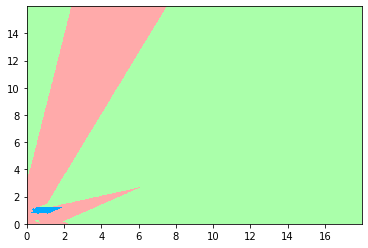

In [116]:
# calculate min, max and limits
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

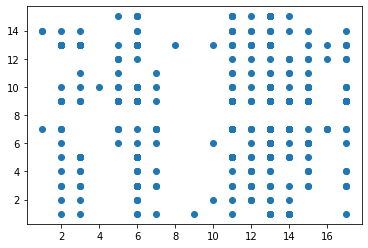

In [118]:
plt.scatter(X[:, 0], X[:, 1])